# Predicting Heart Disease

In [96]:
#importing all the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score, classification_report
from sklearn.externals.six import StringIO
from IPython.display import Image

# Tasks:

# A)	Data Analysis:

In [ ]:
# a.) Import the dataset
# b.) Get information about dataset (mean, max, min, quartiles etc.)
# c.) Find the correlation between all fields.


In [2]:
# Loading Dataset

dataset = pd.read_csv('E:/Intellipaat/Python/dataset.csv')

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
corr= dataset.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# B) Data Visualization:

In [9]:
# a.) Visualize the number of patients having a heart disease and not having a heart disease.
# b.) Visualize the age and weather patient has disease or not
# c.) Visualize correlation between all features using a heat map

Text(0.5,1,'0 : Patients not having a heart disease, 1: Patients having a heart disease')

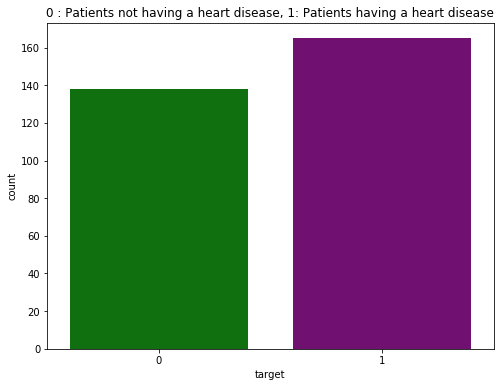

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(dataset.target, palette = ['green', 'purple'])
plt.title ("0 : Patients not having a heart disease, 1: Patients having a heart disease")

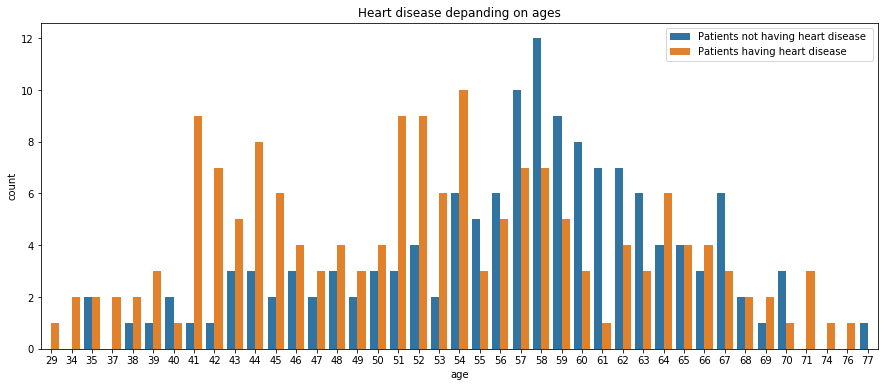

In [37]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'age', hue = 'target', data = dataset)
plt.title("Heart disease depanding on ages")
plt.legend(["Patients not having heart disease ","Patients having heart disease "], loc= "upper right")

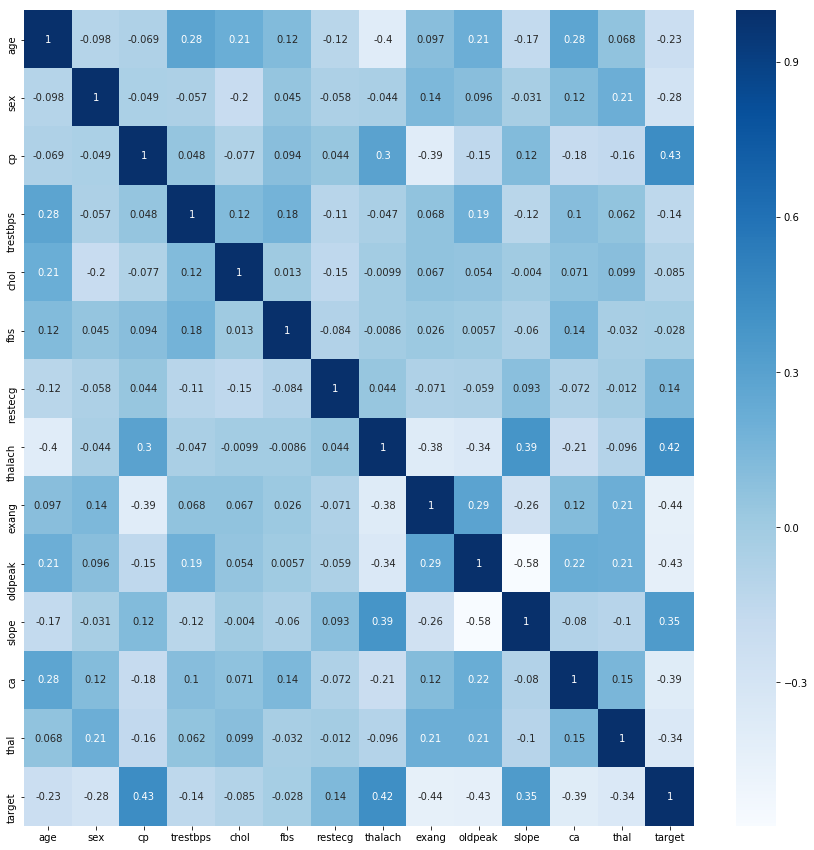

In [147]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap="Blues")

# C)	Logistic Regression:

In [45]:
# a.) Build a simple logistic regression model
#   i.   Divide the dataset in 70:30 ratio
#   ii.  Build the model on train set and predict the values on test set
#   iii. Build the confusion matrix and get the accu	racy score

In [47]:
x = pd.DataFrame(dataset.iloc[:, :-1])
y = pd.DataFrame(dataset.iloc[:, -1])

In [48]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [49]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212, 1)
(91, 1)


In [53]:
model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
y_pred_model_1 = model_1.predict(x_test)

In [55]:
y_pred_model_1 = pd.DataFrame(y_pred_model_1, columns=['Predicted Values'])
y_pred_model_1.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [58]:
conf_mat_model_1 = confusion_matrix (y_test, y_pred_model_1)
print (" Confusion Matrix for Logistic Regression Model: ")
conf_mat_model_1

 Confusion Matrix for Logistic Regression Model: 


array([[29, 12],
       [ 7, 43]], dtype=int64)

In [59]:
accuracy_model_1 = accuracy_score (y_test, y_pred_model_1)
print ("Accuracy for Logistic Regression Model: ")
accuracy_model_1

Accuracy for Logistic Regression Model: 


0.7912087912087912

# D)	Decision Tree:

In [60]:
# a.) Build a decision tree model
#    i.    Divide the dataset in 70:30 ratio
#    ii.   Build the model on train set and predict the values on test set
#    iii.  Build the confusion matrix and calculate the accuracy
#    iv.   Visualize the decision tree using the graphviz package


In [62]:
model_2 = DecisionTreeClassifier()
model_2.fit (x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
y_pred_model_2 = model_2.predict (x_test)

In [65]:
y_pred_model_2 = pd.DataFrame(y_pred_model_2,columns= ['Predicted Values'])
y_pred_model_2.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [66]:
conf_mat_model_2 = confusion_matrix (y_test, y_pred_model_2)
print (" Confusion Matrix for Decission Tree Model: ")
conf_mat_model_2

 Confusion Matrix for Decission Tree Model: 


array([[31, 10],
       [15, 35]], dtype=int64)

In [67]:
accuracy_model_2 = accuracy_score (y_test, y_pred_model_2)
print ("Accuracy for Decision Tree Model: ")
accuracy_model_2

Accuracy for Decision Tree Model: 


0.7252747252747253

In [78]:
dot_data = StringIO()

In [81]:
export_graphviz(model_2, out_file = dot_data)

In [83]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 0.5\\ngini = 0.496\\nsamples = 212\\nvalue = [97, 115]"] ;\n1 [label="X[8] <= 0.5\\ngini = 0.367\\nsamples = 99\\nvalue = [75, 24]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[11] <= 0.5\\ngini = 0.5\\nsamples = 43\\nvalue = [21, 22]"] ;\n1 -> 2 ;\n3 [label="X[12] <= 2.5\\ngini = 0.278\\nsamples = 24\\nvalue = [4, 20]"] ;\n2 -> 3 ;\n4 [label="X[7] <= 96.5\\ngini = 0.105\\nsamples = 18\\nvalue = [1, 17]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 17\\nvalue = [0, 17]"] ;\n4 -> 6 ;\n7 [label="X[6] <= 0.5\\ngini = 0.5\\nsamples = 6\\nvalue = [3, 3]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [2, 0]"] ;\n7 -> 8 ;\n9 [label="X[9] <= 0.85\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n9 -> 10 ;\n11 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]

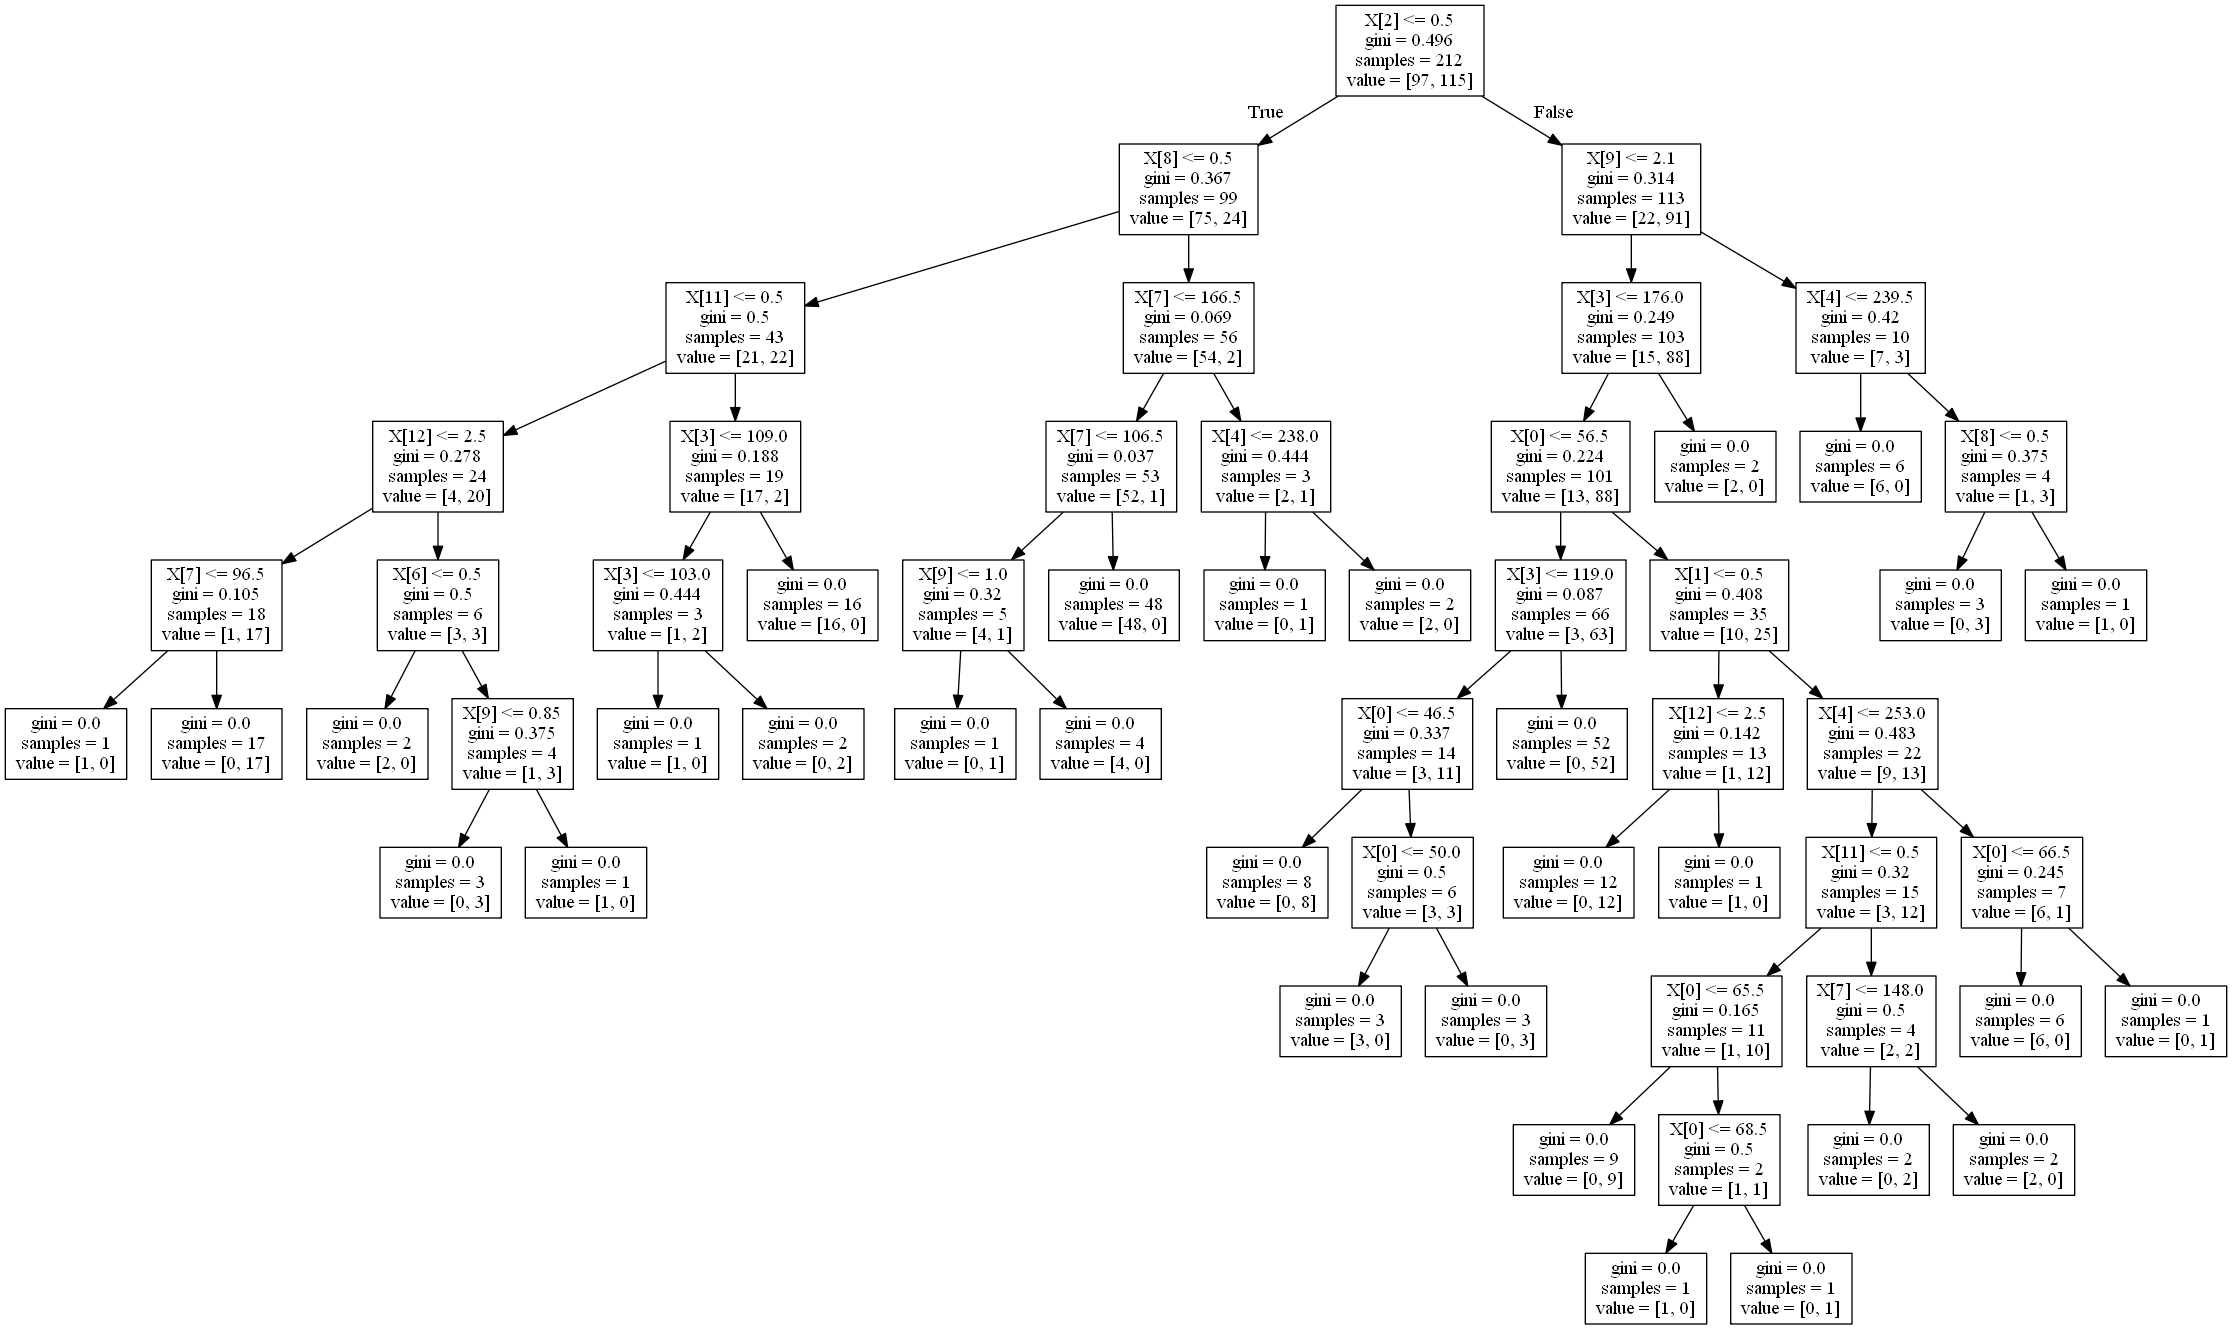

In [84]:
Image(graph.create_png())

# E)	Random Forest:

In [71]:
# a.) Build a Random Forest model 
#    i.    Divide the dataset in 70:30 ratio
#    ii.   Build the model on train set and predict the values on test set
#    iii.  Build the confusion matrix and calculate the accuracy
#    iv.   Visualize the model using the graphviz package


In [85]:
model_3 = RandomForestClassifier()
model_3.fit(x_train,y_train)

E:\ProgramFiles\Python\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\ProgramFiles\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
y_pred_model_3 = model_3.predict(x_test)

In [87]:
y_pred_model_3 = pd.DataFrame(y_pred_model_3,columns=['Predicted Values'])
y_pred_model_3.head()

,Predicted Values
0,0
1,1
2,0
3,0
4,0


In [88]:
conf_mat_model_3 = confusion_matrix (y_test, y_pred_model_3)
print (" Confusion Matrix for Random Forest Model: ")
conf_mat_model_3

 Confusion Matrix for Random Forest Model: 


array([[32,  9],
       [17, 33]], dtype=int64)

In [90]:
accuracy_model_3 = accuracy_score (y_test, y_pred_model_3)
print ("Accuracy for Random Forest Model: ")
accuracy_model_3

Accuracy for Random Forest Model: 


0.7142857142857143

In [91]:
dot_data_RF = StringIO()

In [93]:
export_graphviz(model_3.estimators_[0], out_file = dot_data_RF)

In [94]:
graph = pydotplus.graph_from_dot_data(dot_data_RF.getvalue())
dot_data_RF.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[7] <= 162.5\\ngini = 0.487\\nsamples = 130\\nvalue = [89, 123]"] ;\n1 [label="X[4] <= 223.5\\ngini = 0.488\\nsamples = 87\\nvalue = [78, 57]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[9] <= 1.95\\ngini = 0.455\\nsamples = 24\\nvalue = [14, 26]"] ;\n1 -> 2 ;\n3 [label="X[11] <= 0.5\\ngini = 0.382\\nsamples = 20\\nvalue = [9, 26]"] ;\n2 -> 3 ;\n4 [label="X[12] <= 0.5\\ngini = 0.142\\nsamples = 16\\nvalue = [2, 24]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="X[2] <= 0.5\\ngini = 0.077\\nsamples = 15\\nvalue = [1, 24]"] ;\n4 -> 6 ;\n7 [label="X[4] <= 215.0\\ngini = 0.245\\nsamples = 5\\nvalue = [1, 6]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 6]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 10\\nvalue = [0, 18]"] ;\n6 -> 10 ;\n11 [label="X[4] <= 202.0\\ngini = 0.346\\

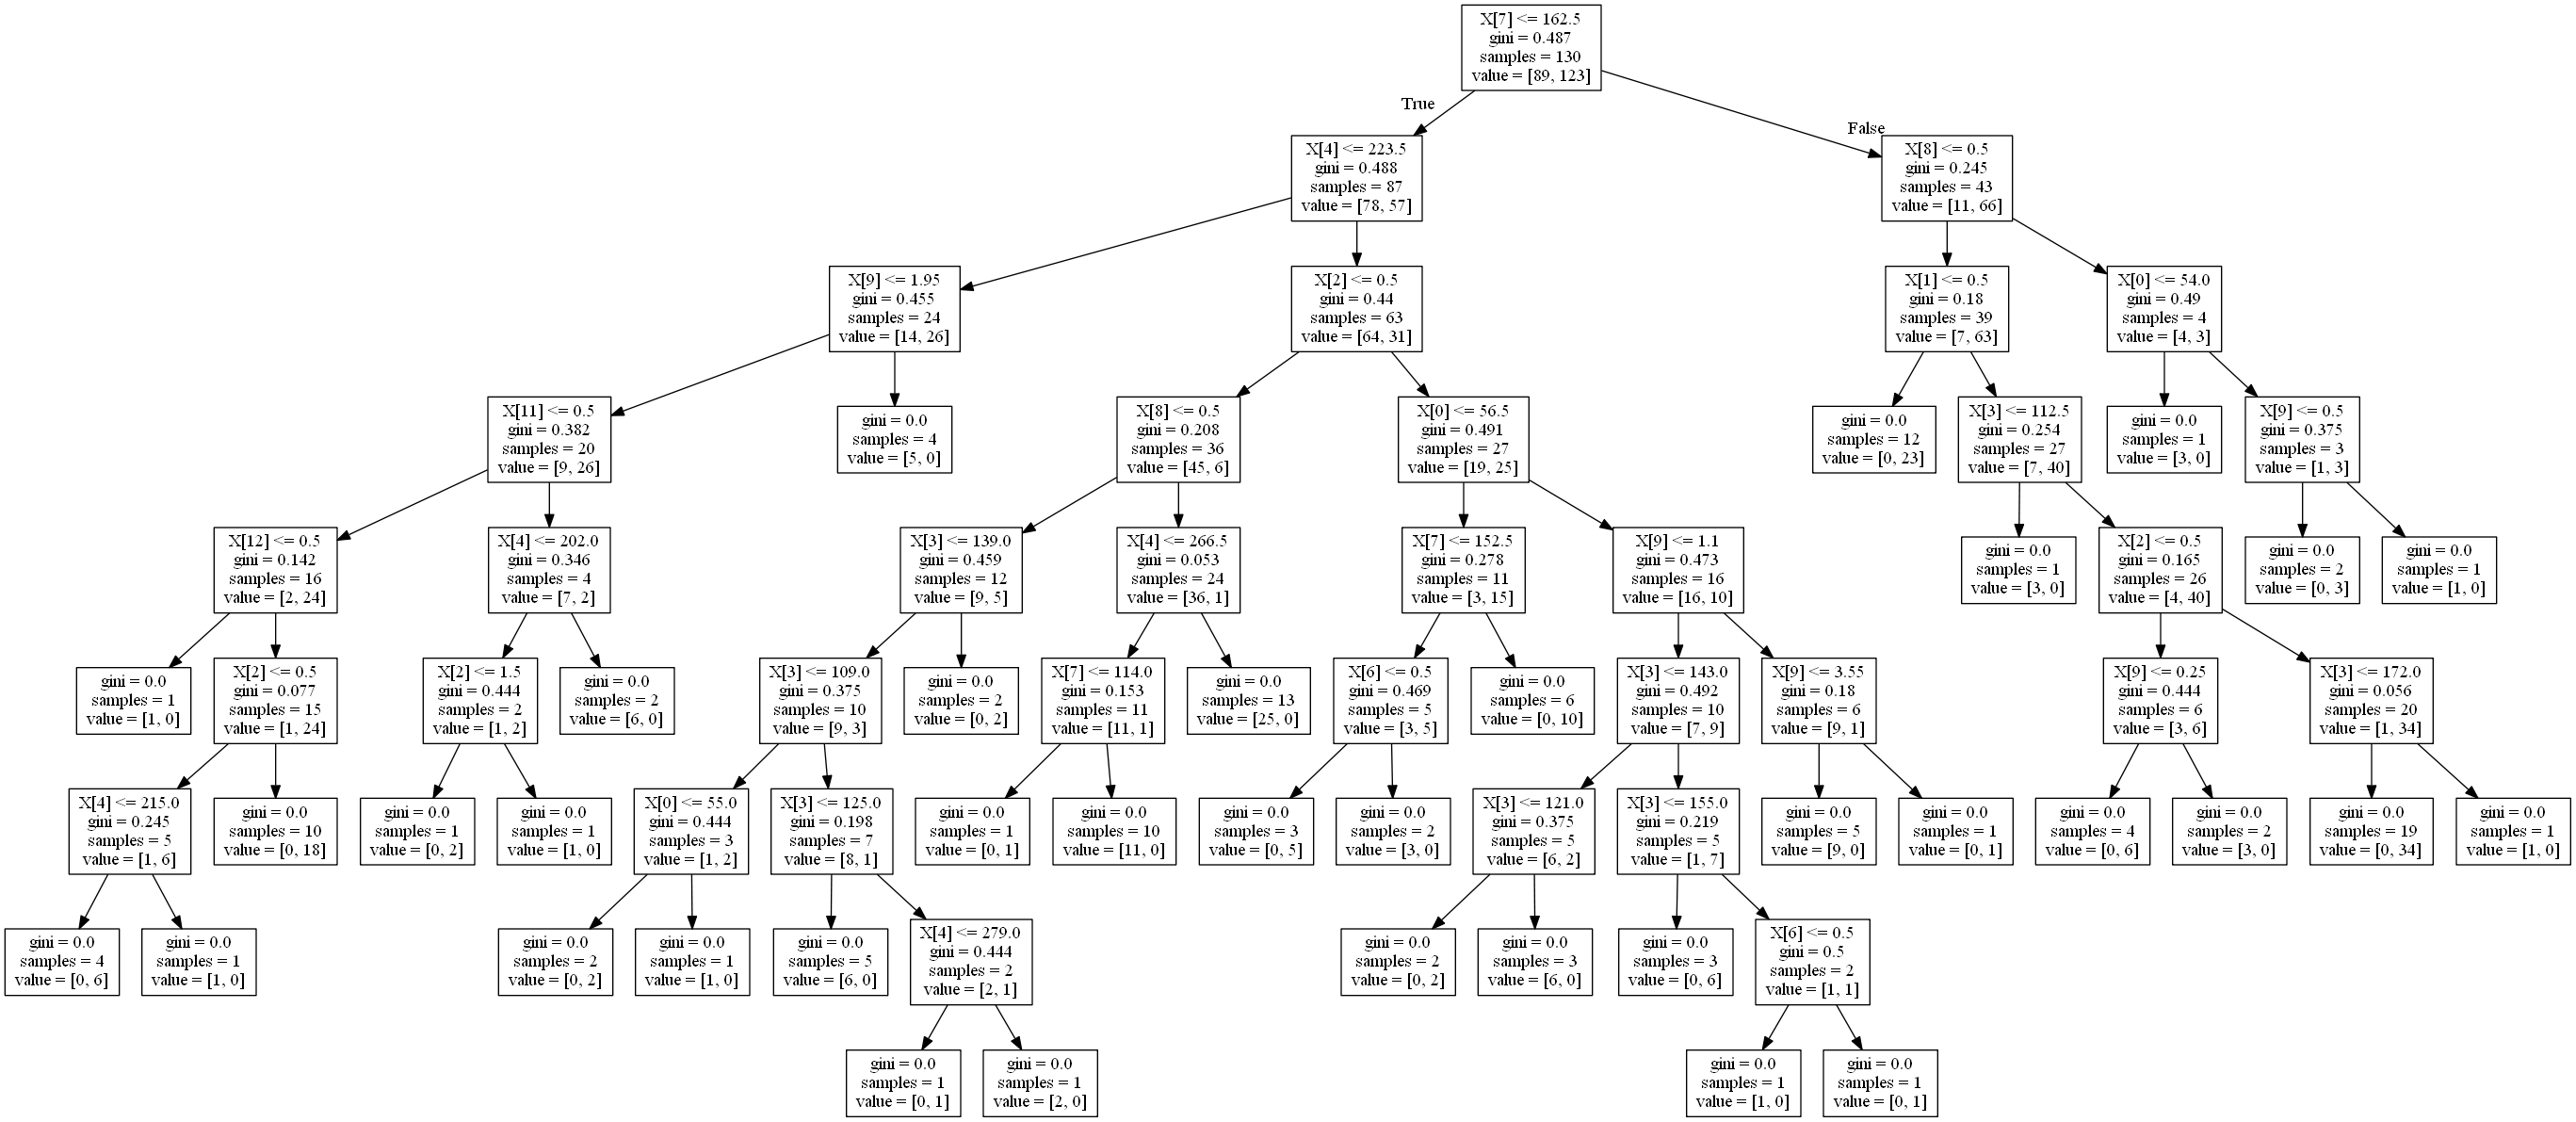

In [95]:
Image(graph.create_png())

# F)	Select the best model

In [72]:
# a.) Print the confusion matrix of all classifiers
# b.) Print the classification report of all classifiers
# c.) Calculate Recall Precision and F1 score of all the models
# d.) Visualize confusion matrix using heatmaps and Recall Precision and F1 score of all the models using bar graphs
# e.) Select the best model based on the best accuracies


In [122]:
print (" Confusion Matrix for Logistic Regression: ")
print (conf_mat_model_1)
print (" Confusion Matrix for Decision Tree: ")
print (conf_mat_model_2)
print (" Confusion Matrix for Random Forest: ")
print (conf_mat_model_3)

 Confusion Matrix for Logistic Regression: 
[[29 12]
 [ 7 43]]
 Confusion Matrix for Decision Tree: 
[[31 10]
 [15 35]]
 Confusion Matrix for Random Forest: 
[[32  9]
 [17 33]]


In [120]:
print (" Classification Report for Logistic Regression: ")
classification_report(y_test, y_pred_model_1)

 Classification Report for Logistic Regression: 


u'              precision    recall  f1-score   support\n\n           0       0.81      0.71      0.75        41\n           1       0.78      0.86      0.82        50\n\n   micro avg       0.79      0.79      0.79        91\n   macro avg       0.79      0.78      0.79        91\nweighted avg       0.79      0.79      0.79        91\n'

In [117]:
print (" Classification Report for Decision Tree: ")
classification_report(y_test, y_pred_model_2)

 Classification Report for Decision Tree: 


u'              precision    recall  f1-score   support\n\n           0       0.67      0.76      0.71        41\n           1       0.78      0.70      0.74        50\n\n   micro avg       0.73      0.73      0.73        91\n   macro avg       0.73      0.73      0.72        91\nweighted avg       0.73      0.73      0.73        91\n'

In [115]:
print (" Classification Report for Random Forest: ")
classification_report(y_test, y_pred_model_3)

 Classification Report for Random Forest: 


u'              precision    recall  f1-score   support\n\n           0       0.65      0.78      0.71        41\n           1       0.79      0.66      0.72        50\n\n   micro avg       0.71      0.71      0.71        91\n   macro avg       0.72      0.72      0.71        91\nweighted avg       0.73      0.71      0.71        91\n'

In [129]:
score = { 'Logistic_Reg': [accuracy_model_1] , 'Decision_Tree': [accuracy_model_2], 'Random_Forest': [accuracy_model_3]}
score_df = pd.DataFrame(score)
score_df

,Decision_Tree,Logistic_Reg,Random_Forest
0,0.725275,0.791209,0.714286


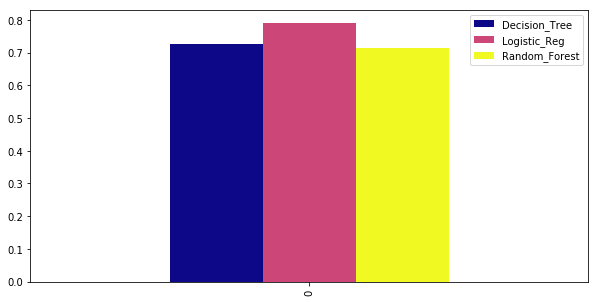

In [143]:
score_df.plot(kind='bar', figsize=(10, 5), colormap='plasma')

In [123]:
conf_mat_final = {'Logistic_Reg': conf_mat_model_1, 'Decision_Tree': conf_mat_model_2, 'Random_Forest': conf_mat_model_3 }

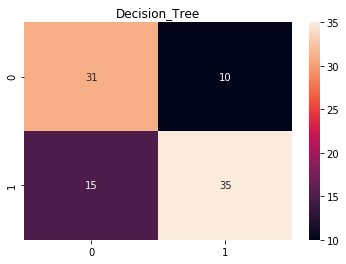

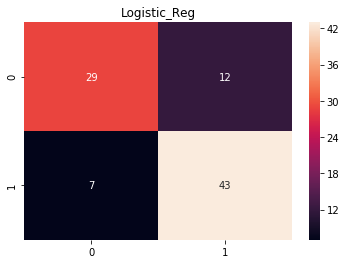

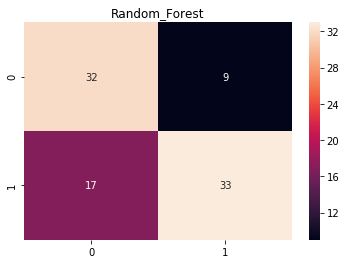

In [145]:
for label,matrix in conf_mat_final.items():
    plt.title (label)
    sns.heatmap(matrix, annot=True)
    plt.show()

In [125]:
print (" Accuracy for Logistic Regression: ")
print (accuracy_model_1)
print (" Accuracy for Decision Tree: ")
print (accuracy_model_2)
print (" Accuracy for Random Forest: ")
print (accuracy_model_3)

 Accuracy for Logistic Regression: 
0.7912087912087912
 Accuracy for Decision Tree: 
0.7252747252747253
 Accuracy for Random Forest: 
0.7142857142857143


In [127]:
print ("The best model based on the best accuracies is Logistic Regression with accuracy: ")
print (accuracy_model_1)

The best model based on the best accuracies is Logistic Regression with accuracy: 
0.7912087912087912
